<a href="https://colab.research.google.com/github/ankitkrtiwari7/ankitkrtiwari7/blob/main/yesbank_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# loading data
df1 = pd.read_csv('/content/drive/MyDrive/yes_bank_analysis/data_YesBank_StockPrices.csv')

In [3]:
df1

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [4]:
df = df1.copy()

In [5]:
#checking wheater data have nun value or not
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [6]:
df[0:1]

,Date,Open,High,Low,Close
0,Jul-05,13.0,14.0,11.25,12.46


In [7]:
df.shape

(185, 5)

In [8]:
#Checking the information about the types variables in the dataset about and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


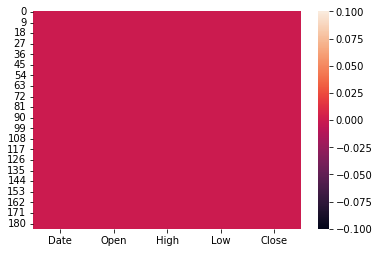

In [9]:
# to check null values by visualization method
sns.heatmap(df.isnull(),cbar=True) 

In [10]:
#Description of the data 
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [11]:
data3 = df.drop(['Date'],axis=1)

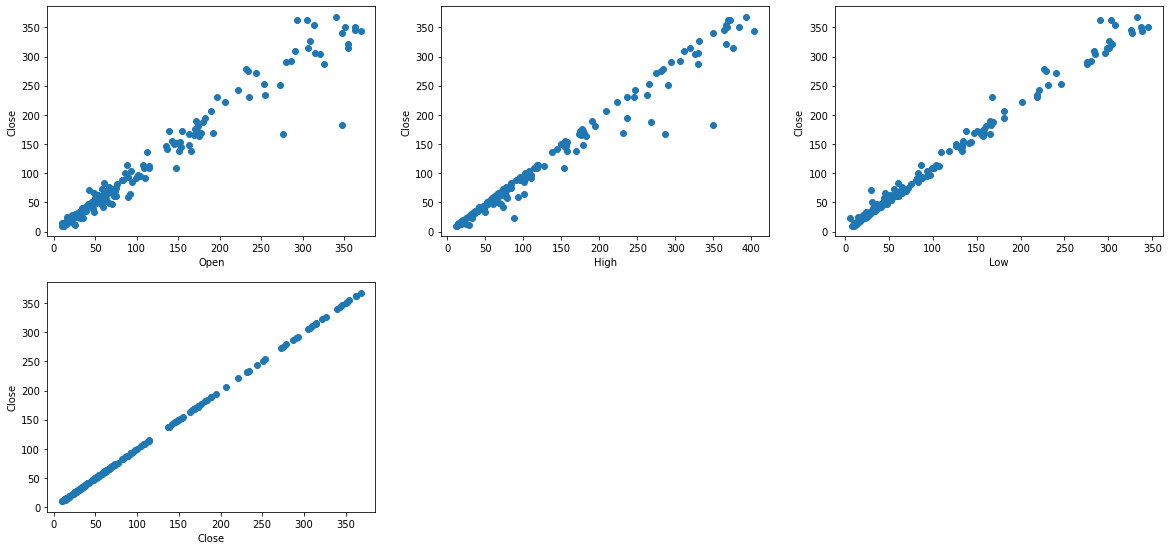

In [12]:
#Plotting the scatter plot
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in data3:
  ax = plt.subplot(12, 3, plotnumber)
  plt.scatter(data3[feature], data3['Close'])
  plt.xlabel(feature)
  plt.ylabel('Close')
  plotnumber+=1

plt.show()

In [13]:
df['Date'][0:5]

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

In [14]:
from datetime import datetime
#Since the datatype of column 'Date' is object, we are converting it to datetime type.
from datetime import datetime
from datetime import date

df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [15]:
#Checking once again first few rows of our dataset to ensure whether the date datatype is changed or not.
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [16]:
#Setting the column Date as the index
df.set_index('Date',inplace=True)

Text(0.5, 1.0, 'Closing price history')

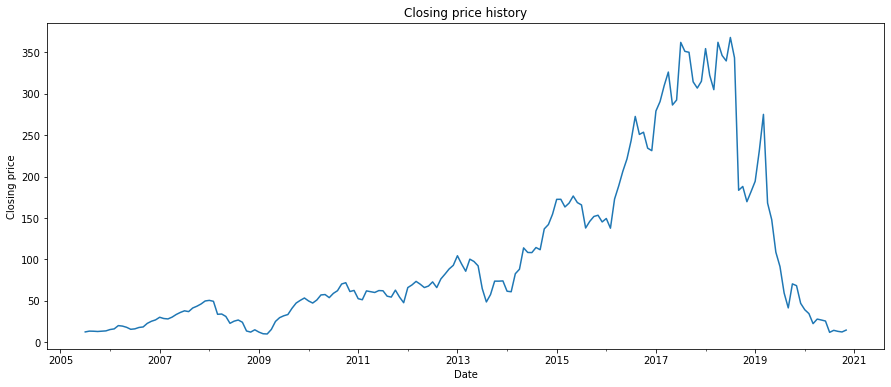

In [17]:
# plotting closing price history
ax = df['Close'].plot(figsize=(15,6))
ax.autoscale()
plt.ylabel('Closing price')
plt.title('Closing price history')

Text(0.5, 1.0, 'Opening Price History')

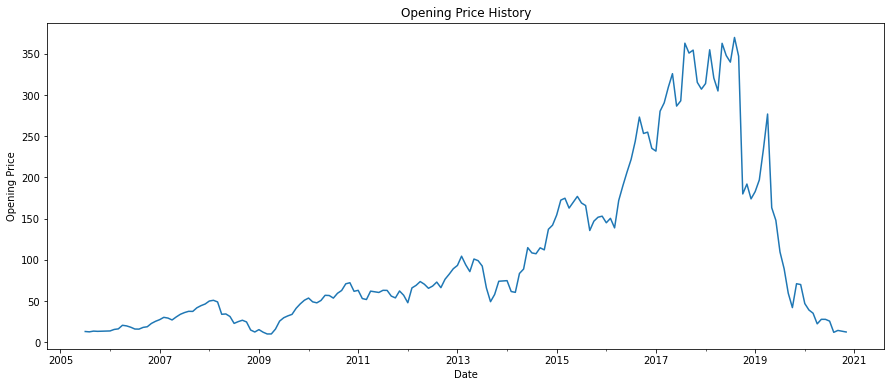

In [18]:
ax = df['Open'].plot(figsize=(15,6))
ax.autoscale()
plt.ylabel('Opening Price')
plt.title('Opening Price History')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

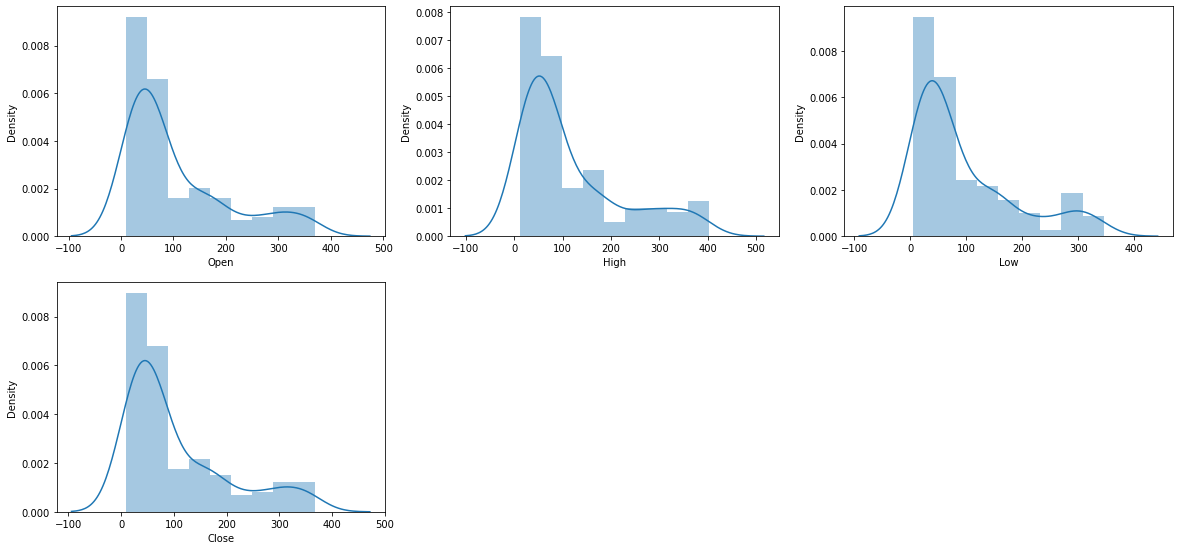

In [19]:
#Plotting distplots for all the columns
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in df[1:]:
  ax = plt.subplot(12, 3, plotnumber)
  sns.distplot(df[feature])
  plt.xlabel(feature)
  plotnumber+=1

plt.show()

In [20]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


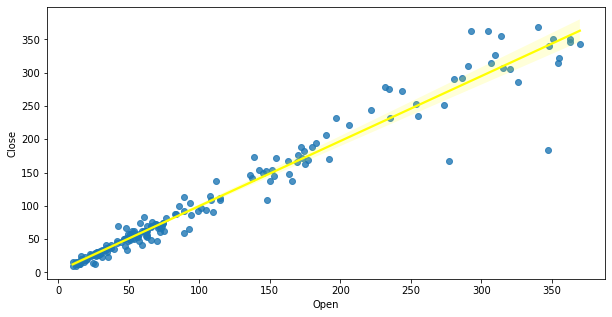

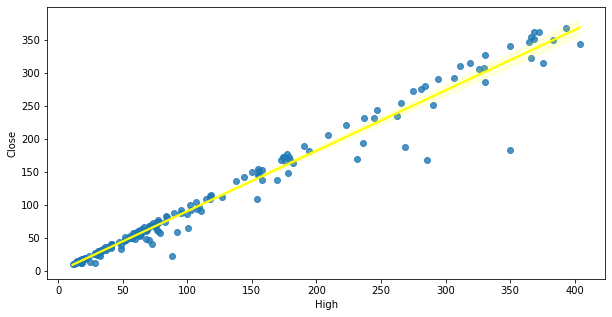

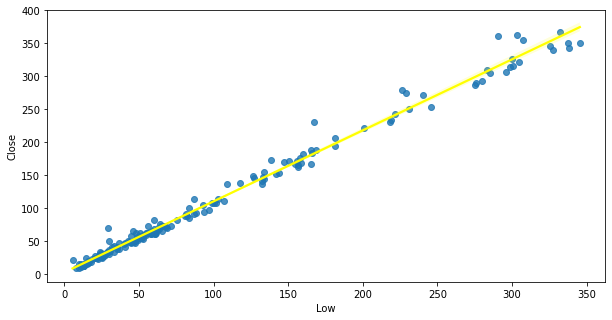

<Figure size 720x360 with 0 Axes>

In [21]:
# plotting Regression plot of each columns of dataset v/s  df close column
for col in df.columns.to_list()[:]:
  plt.figure(figsize=(10, 5))
  if col == 'Close':
    pass
  else:
    sns.regplot(x=df[col],y=df["Close"],line_kws={"color": "yellow"})
  
  plt.show()

In [22]:
#Creating a new dataframe with only date and close columns for sake of simplicity and further implementation.
stockdf = df['Close'].reset_index()

In [23]:
stockdf['Date'] = pd.to_datetime(stockdf.Date,format='%Y-%m')

In [24]:
#Creating new columns Year,month and quarter.
stockdf['Year']= stockdf['Date'].dt.year
stockdf['Month']= stockdf['Date'].dt.month
stockdf['Quarter']=stockdf['Date'].dt.quarter

In [25]:
stockdf=stockdf.set_index('Date')

In [26]:
stockdf.head()

,Close,Year,Month,Quarter
Date,,,,
2005-07-01,12.46,2005,7,3
2005-08-01,13.42,2005,8,3
2005-09-01,13.30,2005,9,3
2005-10-01,12.99,2005,10,4
2005-11-01,13.41,2005,11,4


In [27]:
s=stockdf.copy()

In [28]:
t=df.copy()
t.reset_index(inplace=True)

In [29]:
t['Date'] = pd.to_datetime(t.Date,format='%Y-%m')
t['Month']= t['Date'].dt.month
t['Year']= t['Date'].dt.year
t['Quarter']= t['Date'].dt.quarter

In [30]:
t1 = t.drop(["Date"], axis = 1)

In [31]:
t=t.set_index('Date')

In [32]:
#Normalising the data
from scipy.stats import boxcox
t['Close']=boxcox(t['Close'],0)
t['Open']=boxcox(t['Open'],0)
t['High']=boxcox(t['High'],0.5)
t['Low']=boxcox(t['Low'],0.5)


In [33]:
#Creating new features
t['open-high'] = t['Open']-t['High']
t['open-low'] = t['Open'] - t['Low']
t['close-high'] = t['Close']-t['High']
t['close-low'] = t['Close'] - t['Low']
t['high-low'] = t['High'] - t['Low']
t['open-close'] = t['Open'] - t['Close']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

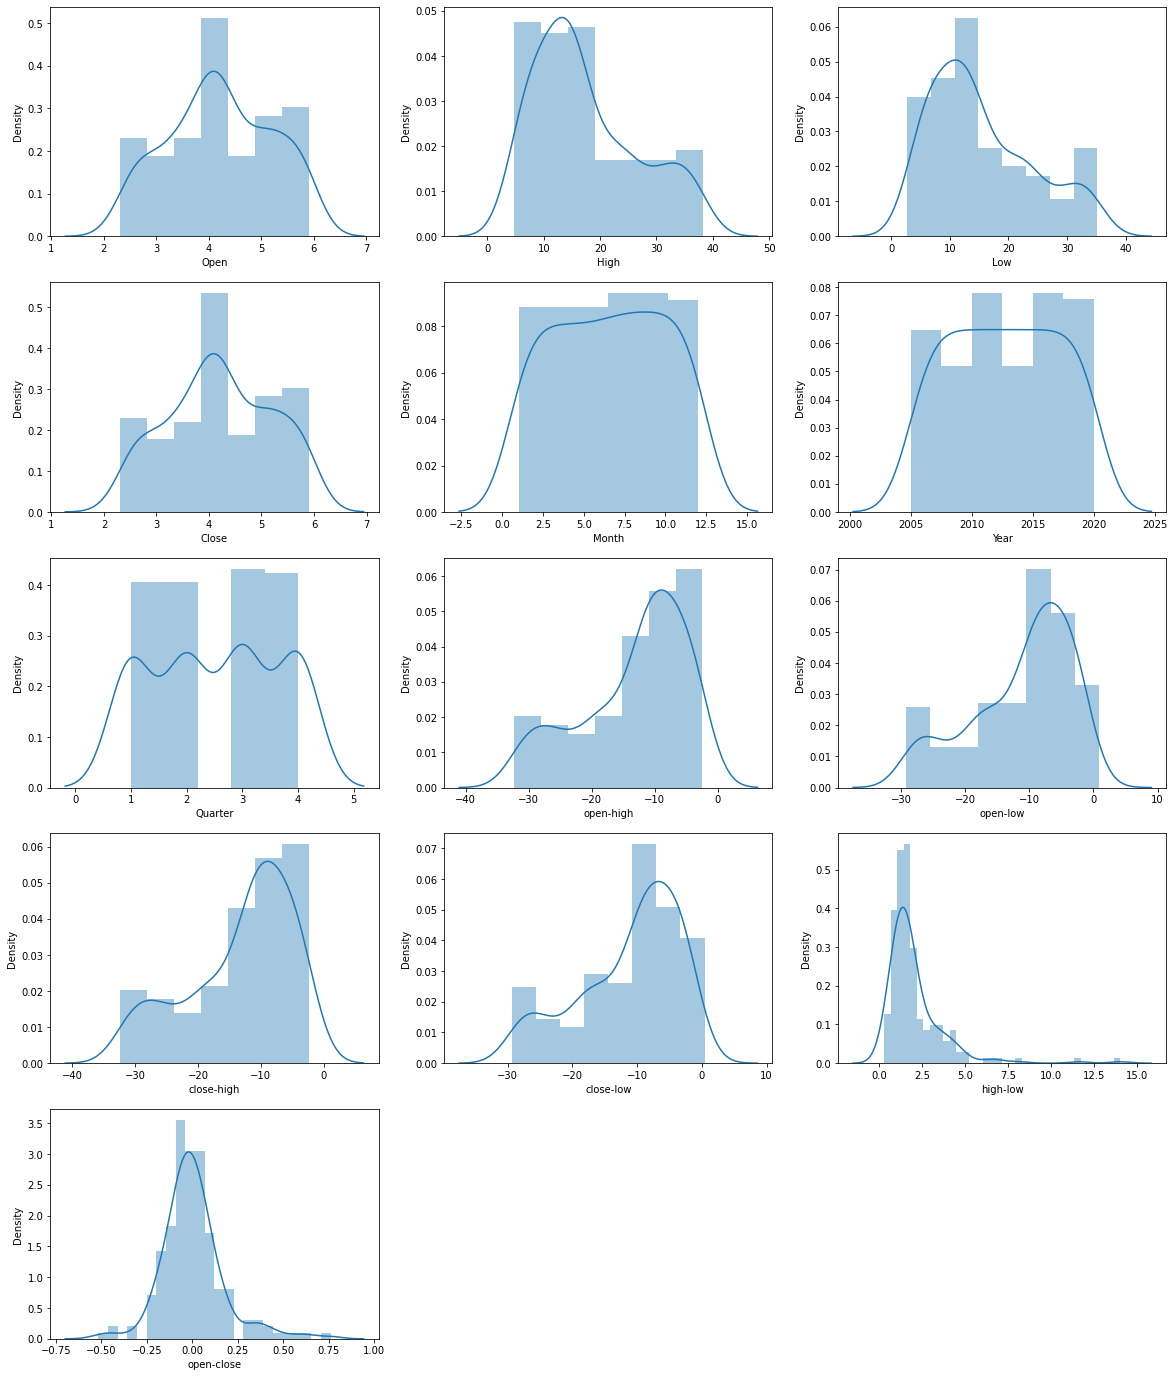

In [34]:
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in t[1:]:
  ax = plt.subplot(12, 3, plotnumber)
  sns.distplot(t[feature])
  plt.xlabel(feature)
  plotnumber+=1

plt.show()

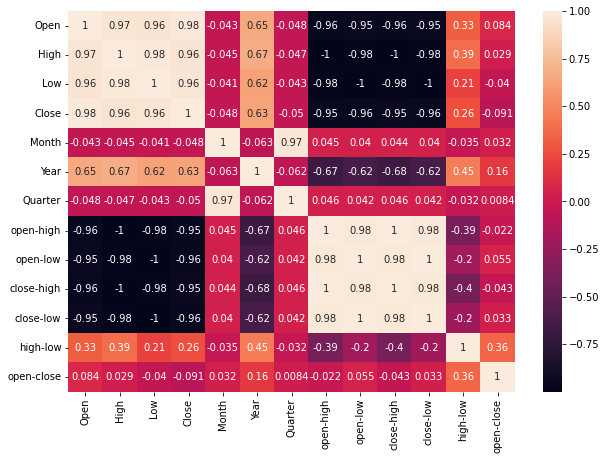

In [35]:
#Plotting a correlation plot
plt.figure(figsize=(10,7))
sns.heatmap(t.corr(),annot=True)

In [36]:
#Keeping only columns that are not correlated
t=t[['Month','Year','high-low','open-close','Close']]

In [37]:
t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       185 non-null    int64  
 1   Year        185 non-null    int64  
 2   high-low    185 non-null    float64
 3   open-close  185 non-null    float64
 4   Close       185 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 8.7 KB


In [38]:
stk_df=stockdf.copy()

In [39]:
from sklearn.model_selection import TimeSeriesSplit

In [40]:
t1.head(2)

,Open,High,Low,Close,Month,Year,Quarter
0,13.00,14.00,11.25,12.46,7,2005,3
1,12.58,14.88,12.55,13.42,8,2005,3


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
t1 = pd.DataFrame(scaler.fit_transform(t1), columns = t1.columns,index=t1.index)
t1.head()

,Open,High,Low,Close,Month,Year,Quarter
0,0.008334,0.007027,0.016767,0.006929,0.545455,0.0,0.666667
1,0.007168,0.009268,0.020591,0.009611,0.636364,0.0,0.666667
2,0.009668,0.009242,0.019768,0.009276,0.727273,0.0,0.666667
3,0.008890,0.008224,0.020150,0.008410,0.818182,0.0,1.000000
4,0.009307,0.006722,0.021562,0.009583,0.909091,0.0,1.000000


In [42]:
#Independent features
x = t1.drop(['Close', 'Open', 'High', 'Low'], axis=1)

In [43]:
x = np.random.permutation(x)

In [44]:
#Dependent Feature
y=t1['Close']

In [45]:
tscv = TimeSeriesSplit()

In [46]:
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [47]:
for train_index, test_index in tscv.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34] TEST: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64] TEST: [65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 92 93 94]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94] TEST: [ 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11

In [48]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)
x_train.head()

,0,1,2
0,0.363636,0.600000,0.333333
1,0.272727,0.133333,0.333333
2,0.000000,0.733333,0.000000
3,0.090909,0.600000,0.000000
4,0.727273,1.000000,0.666667


In [49]:
#checking the shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((155, 3), (30, 3), (155, 1), (30, 1))

In [50]:
def train_model(model,x_train,y_train,x_test,y_test):
  
  model.fit(x_train,y_train)
  pred_value=model.predict(x_test)
  MSE=mean_squared_error(y_test,pred_value)
  RMSE=np.sqrt(MSE)
  r2=r2_score(y_test,pred_value)
  adj_r2=1-(1-r2_score(y_test,pred_value))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  print(f'Evaluation matrix-- \n MSE: {MSE}\n RMSE: {RMSE}\n r2Score: {r2}\n adj_r2: {adj_r2}\n')
  print('Evaluation Graph')
  plt.figure(figsize=(10,5))
  p1=plt.plot(pred_value[:100])
  p2=plt.plot(np.array(y_test[:100]))
  plt.legend(["ACTUAL","PREDICTED"],prop={'size': 10})
  plt.show()

In [51]:
#Importing all the required libraries and metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

Evaluation matrix-- 
 MSE: 0.09488742106372323
 RMSE: 0.3080380188608595
 r2Score: -0.051256291506876384
 adj_r2: -0.1725550943730545

Evaluation Graph


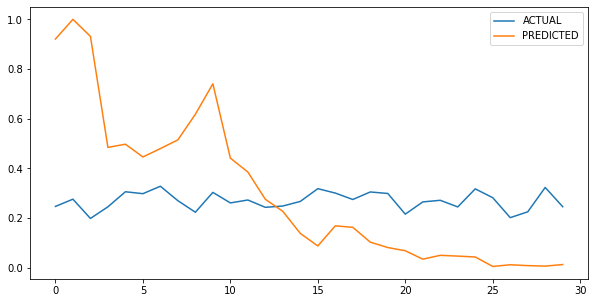

In [52]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

train_model(reg,x_train,y_train,x_test,y_test)

Evaluation matrix-- 
 MSE: 0.11669357898645424
 RMSE: 0.3416044188625994
 r2Score: -0.29284638272105923
 adj_r2: -0.44202096534272006

Evaluation Graph


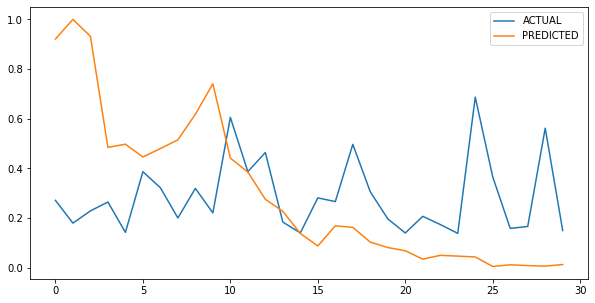

RandomForestRegressor(max_depth=20, max_leaf_nodes=40, n_estimators=60)

In [53]:
rf_model = RandomForestRegressor()
#Defining the hypertuning parameters
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


train_model(rf_grid,x_train,y_train,x_test,y_test)
rf_grid.best_estimator_

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
t2=pd.DataFrame(scaler.fit_transform(t), columns=t.columns,index=t.index)
t2.head()

,Month,Year,high-low,open-close,Close
Date,,,,,
2005-07-01,0.545455,0.0,0.036430,0.437543,0.061527
2005-08-01,0.636364,0.0,0.025872,0.353841,0.082103
2005-09-01,0.727273,0.0,0.031456,0.414885,0.079613
2005-10-01,0.818182,0.0,0.021184,0.416913,0.073075
2005-11-01,0.909091,0.0,0.000000,0.400869,0.081896


In [55]:
X = t2.drop('Close',axis=1)
Y=t2['Close']

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state =0)

In [57]:
X_train.head(2)

,Month,Year,high-low,open-close
Date,,,,
2014-12-01,1.000000,0.600000,0.107085,0.338503
2006-03-01,0.181818,0.066667,0.063597,0.236511


Evaluation matrix-- 
 MSE: 0.03362028565316659
 RMSE: 0.1833583531044239
 r2Score: 0.5570593317493646
 adj_r2: 0.5016917482180352

Evaluation Graph


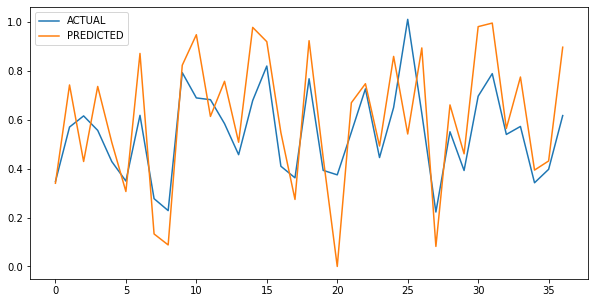

In [58]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

train_model(reg,X_train,Y_train,X_test,Y_test)

Evaluation matrix-- 
 MSE: 0.03444493232428609
 RMSE: 0.18559345981010777
 r2Score: 0.5461947736267918
 adj_r2: 0.4894691203301408

Evaluation Graph


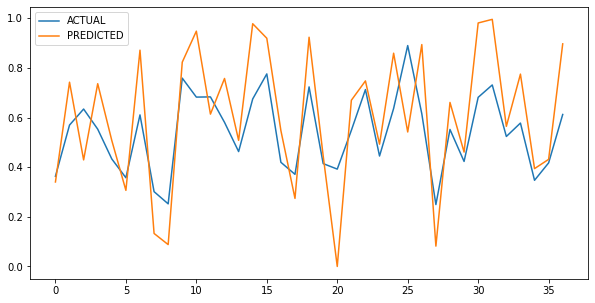

In [59]:
rid=Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(rid, parameters, scoring='neg_mean_squared_error', cv=3)
train_model(ridge_regressor,X_train,Y_train,X_test,Y_test)

Evaluation matrix-- 
 MSE: 0.04078344052329692
 RMSE: 0.2019491037942405
 r2Score: 0.46268617151836355
 adj_r2: 0.395521942958159

Evaluation Graph


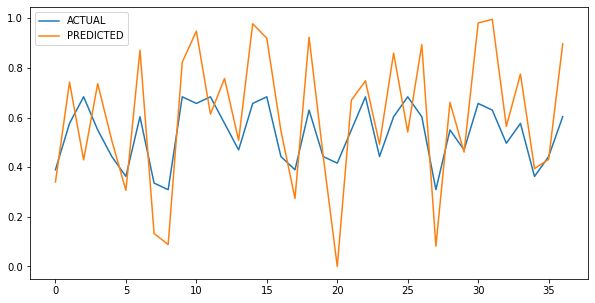

In [60]:
lasso_model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=3)
train_model(lasso_regressor,X_train,Y_train,X_test,Y_test)

Evaluation matrix-- 
 MSE: 0.03617764661283466
 RMSE: 0.19020422343584975
 r2Score: 0.5233666027785515
 adj_r2: 0.4637874281258705

Evaluation Graph


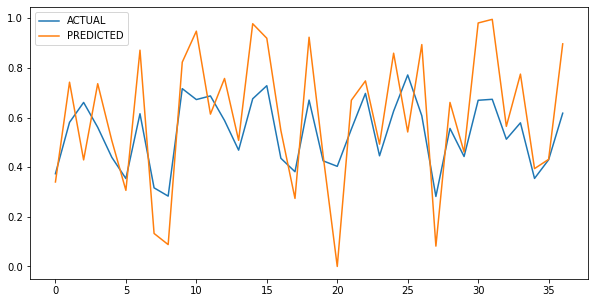

In [61]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
train_model(elastic_regressor,X_train,Y_train,X_test,Y_test)

Evaluation matrix-- 
 MSE: 0.006904702573570233
 RMSE: 0.08309453997447867
 r2Score: 0.9090318980760647
 adj_r2: 0.8976608853355728

Evaluation Graph


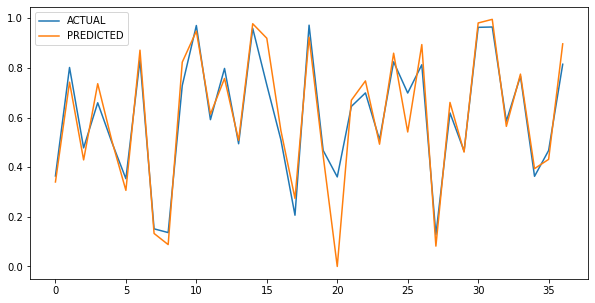

In [62]:
rf_model = RandomForestRegressor()
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)
train_model(rf_grid,X_train,Y_train,X_test,Y_test)

Evaluation matrix-- 
 MSE: 0.005645308875648944
 RMSE: 0.07513527051690799
 r2Score: 0.9256241629932235
 adj_r2: 0.9163271833673764

Evaluation Graph


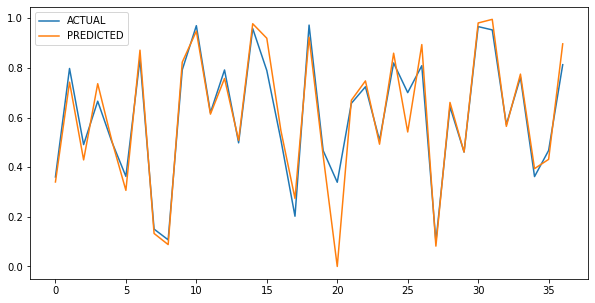

In [63]:
gb_model = RandomForestRegressor()
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0,cv=3)
train_model(gb_grid,X_train,Y_train,X_test,Y_test)

Evaluation matrix-- 
 MSE: 0.0072331584095763945
 RMSE: 0.08504797710455196
 r2Score: 0.904704556869263
 adj_r2: 0.8927926264779209

Evaluation Graph


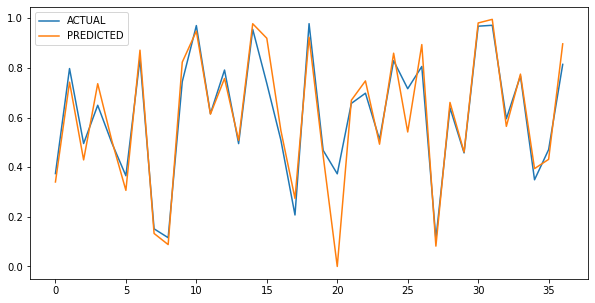

In [64]:
xg=XGBRegressor()
xg_grid=GridSearchCV(gb_model,param_grid=params,verbose=0,cv=3)
train_model(xg_grid,X_train,Y_train,X_test,Y_test)

Evaluation matrix-- 
 MSE: 0.01629087060468155
 RMSE: 0.1276356948689572
 r2Score: 0.7853709755335575
 adj_r2: 0.7585423474752522

Evaluation Graph


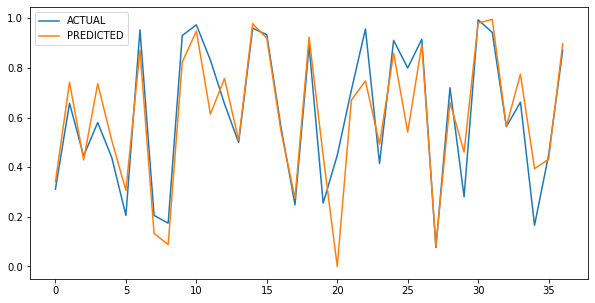

In [65]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
nn={ 'n_neighbors': [1, 2, 3], 'p': [1, 2, 3] }
knn_grid= GridSearchCV(knn,param_grid=nn,verbose=0,cv=3)
train_model(knn_grid,X_train,Y_train,X_test,Y_test)

Evaluation matrix-- 
 MSE: 0.023691935484492558
 RMSE: 0.15392184862615366
 r2Score: 0.6878633975953841
 adj_r2: 0.6488463222948071

Evaluation Graph


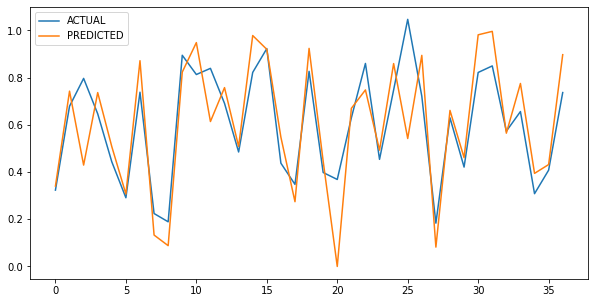

In [66]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear') # using linear kernel
train_model(svm_regressor,X_train,Y_train,X_test,Y_test)

In [67]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
stockdata = stockdf.drop(['Year', 'Month', 'Quarter'], axis = 1)

In [69]:
#Spliting dataset to test and train
split_date = '2014-01-01'
stock_price_train = stockdata.loc[stockdata.index <= split_date].copy()
stock_price_test = stockdata.loc[stockdata.index > split_date].copy()

In [70]:
stock_price_train.shape

(103, 1)

In [71]:
stock_price_test.shape

(82, 1)

In [72]:
# Setup and train model and fit
model = Prophet()
model.fit(stock_price_train.reset_index() \
              .rename(columns={'Date':'ds',
                               'Close':'y'}))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
# Predict on training set with model
stock_price_test_fcst = model.predict(df=stock_price_test.reset_index() \
                                   .rename(columns={'Date':'ds'}))

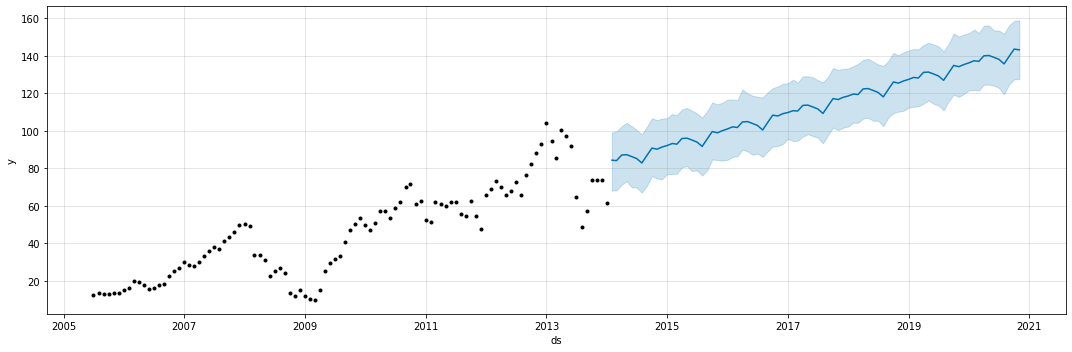

In [74]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(stock_price_test_fcst,
                 ax=ax)
plt.show()

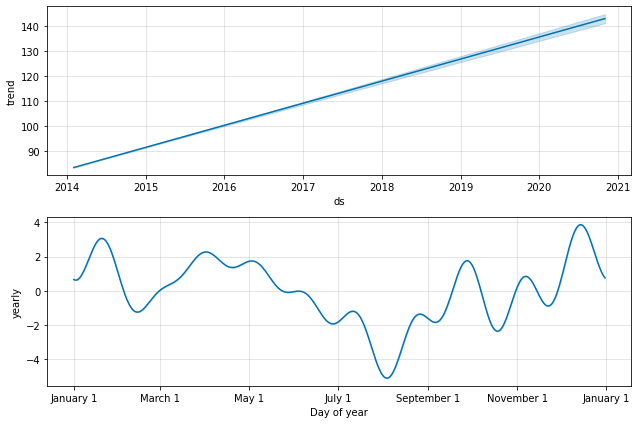

In [75]:
# Plot the components of the model
fig = model.plot_components(stock_price_test_fcst)

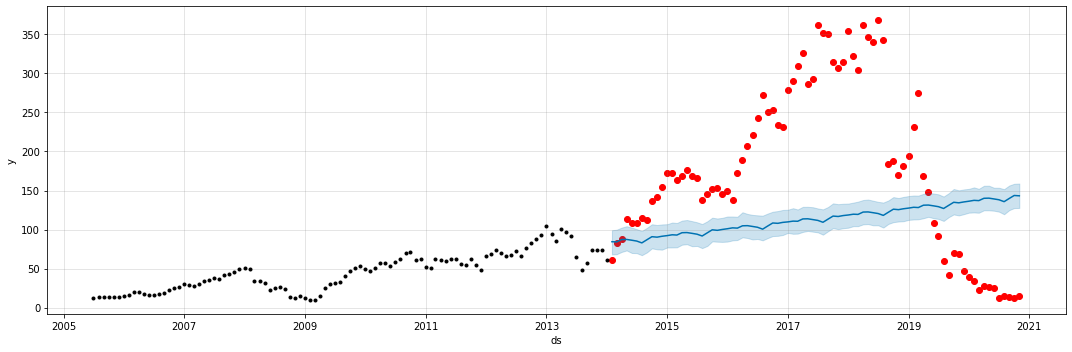

In [76]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(stock_price_test.index, stock_price_test['Close'], color='r')
fig = model.plot(stock_price_test_fcst, ax=ax)

In [77]:
data = pd.DataFrame(df1.copy())


In [78]:
data.head(2)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42


In [79]:
data['Date']='01-'+data['Date']
data.head(1)

,Date,Open,High,Low,Close
0,01-Jul-05,13.0,14.0,11.25,12.46


In [80]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index(['Date'],inplace = True)
data.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [81]:
stock_data_copy1=stockdata.copy()
stock_data_copy1.rename(columns = {'Close':'y'},inplace=True)
stock_data_copy1.head(2)

,y
Date,
2005-07-01,12.46
2005-08-01,13.42


In [82]:
for i in range(6, 13):
    stock_data_copy1["lag_{}".format(i)] = stock_data_copy1.y.shift(i)

In [83]:
stock_data_copy1 = pd.merge(stock_data_copy1,data[['Open','High','Low']], on='Date', how='outer')
stock_data_copy1.tail(5)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,Open,High,Low
Date,,,,,,,,,,,
2020-07-01,11.95,39.20,46.95,68.30,70.45,41.45,59.50,91.30,25.60,28.30,11.10
2020-08-01,14.37,34.55,39.20,46.95,68.30,70.45,41.45,59.50,12.00,17.16,11.85
2020-09-01,13.15,22.45,34.55,39.20,46.95,68.30,70.45,41.45,14.30,15.34,12.75
2020-10-01,12.42,27.95,22.45,34.55,39.20,46.95,68.30,70.45,13.30,14.01,12.11
2020-11-01,14.67,26.85,27.95,22.45,34.55,39.20,46.95,68.30,12.41,14.90,12.21


In [84]:
y = stock_data_copy1.dropna().y
X = stock_data_copy1.dropna().drop(['y'], axis=1)

In [85]:
split_date = '2014-12-01'
X_train = X.loc[X.index <= split_date].copy()
X_test = X.loc[X.index > split_date].copy()
y_train = y.loc[y.index <= split_date].copy()
y_test = y.loc[y.index > split_date].copy()

Evaluation matrix-- 
 MSE: 165.96868067576102
 RMSE: 12.882883243892302
 r2Score: 0.9861874544836052
 adj_r2: 0.9838853635642061

Evaluation Graph


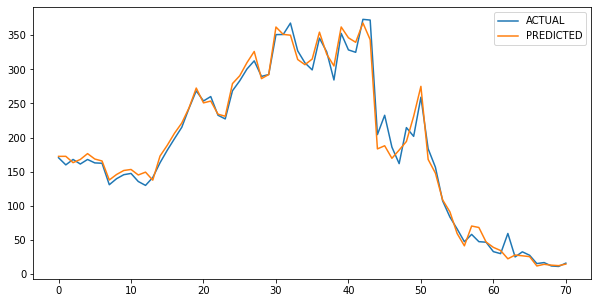

In [86]:
#Linear Reggression
lr = LinearRegression()
train_model(lr,X_train,y_train,X_test,y_test)

In [87]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

Evaluation matrix-- 
 MSE: 167.0377832870594
 RMSE: 12.924309779909308
 r2Score: 0.9860984796937826
 adj_r2: 0.9837815596427464

Evaluation Graph


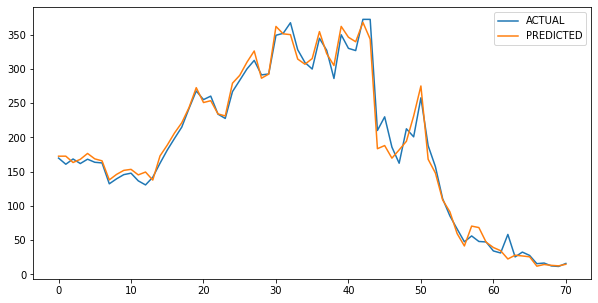

In [88]:
rid=Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(rid, parameters, scoring='neg_mean_squared_error', cv=3)
train_model(ridge_regressor,X_train,y_train,X_test,y_test)

Evaluation matrix-- 
 MSE: 166.06332496288215
 RMSE: 12.886555977563678
 r2Score: 0.9861795778256816
 adj_r2: 0.9838761741299618

Evaluation Graph


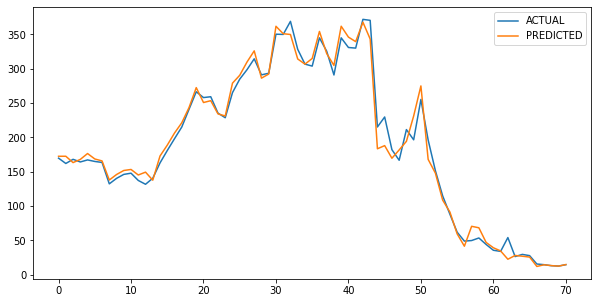

In [89]:
lasso_model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=3)
train_model(lasso_regressor,X_train,y_train,X_test,y_test)

Evaluation matrix-- 
 MSE: 166.28616134252633
 RMSE: 12.89519915869958
 r2Score: 0.9861610325337384
 adj_r2: 0.9838545379560282

Evaluation Graph


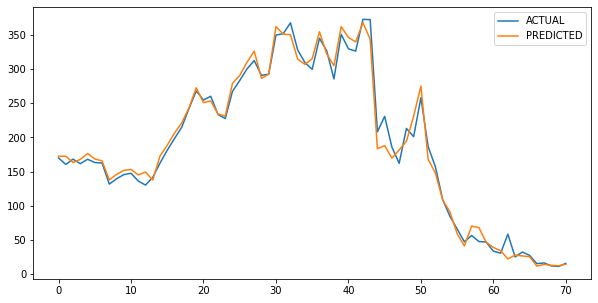

In [90]:
from sklearn.linear_model import BayesianRidge
# Creating and training model
bridge = BayesianRidge()
train_model(bridge,X_train,y_train,X_test,y_test)

Evaluation matrix-- 
 MSE: 11114.14372410571
 RMSE: 105.42363930402759
 r2Score: 0.07503864319514486
 adj_r2: -0.07912158293899774

Evaluation Graph


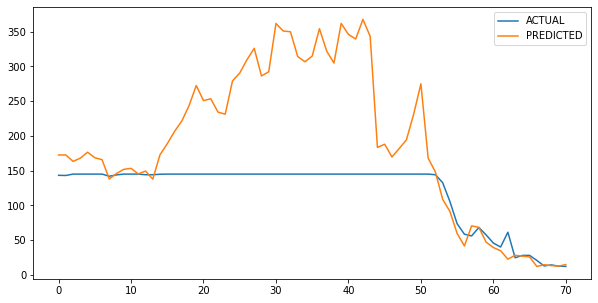

In [91]:
#Importing Random forest regressor and implementing Random forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)
train_model(rf_grid,X_train,y_train,X_test,y_test)

In [92]:
optimal_rf_model=rf_grid.best_estimator_

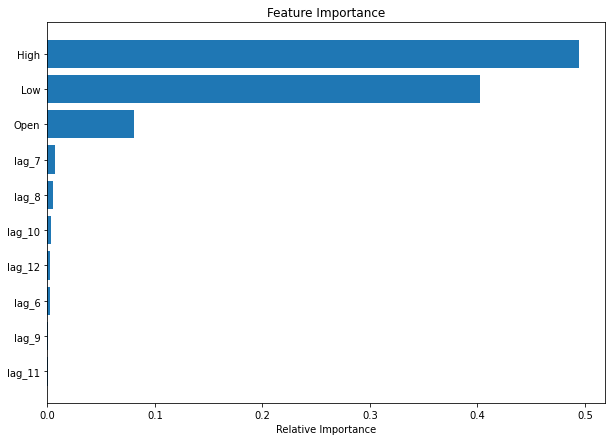

In [93]:
X_imputed_df = pd.DataFrame(X_train, columns = X.columns)
features = X_imputed_df.columns
importances = optimal_rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,7))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
                          # for determining ARIMA orders

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

In [95]:
!pip install pmdarima

In [95]:
!pip uninstall statsmodels

In [96]:

!pip install statsmodels

In [97]:
from pmdarima import auto_arima

In [98]:
stockdata.head(2)

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
